### What is a Tensor?

In [4]:
import torch
import torchvision.transforms as transforms
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt

In [3]:
dataset = MNIST(root='data/', download=True)
print(len(dataset))
print(dataset)

60000
Dataset MNIST
    Number of datapoints: 60000
    Root location: data/
    Split: Train


Label: 0


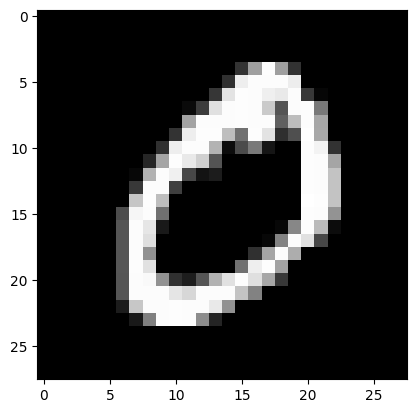

In [131]:
image, label = dataset[1]
plt.imshow(image, cmap='gray')
print('Label:', label)

In [132]:
mnist_tensor_dataset = MNIST(root='data/', download=True, transform=transforms.ToTensor())
print(mnist_tensor_dataset)

Dataset MNIST
    Number of datapoints: 60000
    Root location: data/
    Split: Train
    StandardTransform
Transform: ToTensor()


In [133]:
image_tensor, label = mnist_tensor_dataset[1]
print(image_tensor.shape, label)

torch.Size([1, 28, 28]) 0


In [134]:
print(image_tensor[:,10:15,10:15])
print(torch.max(image_tensor), torch.min(image_tensor))

tensor([[[0.9333, 0.9882, 0.9882, 0.7020, 0.0471],
         [0.9922, 0.9137, 0.8157, 0.3294, 0.0000],
         [0.9412, 0.2784, 0.0745, 0.1098, 0.0000],
         [0.2471, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000]]])
tensor(1.) tensor(0.)


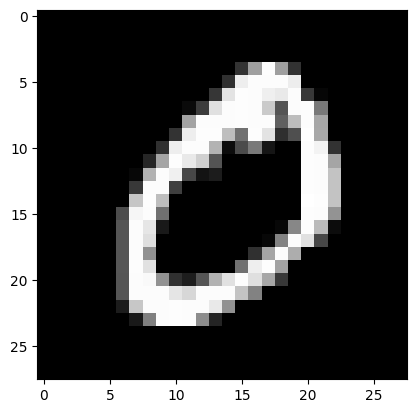

In [135]:
plt.imshow(image_tensor[0,:,:],cmap = 'gray')

In [136]:
train_data, validation_data = torch.utils.data.random_split(mnist_tensor_dataset, [50000, 10000])
print(len(train_data), len(validation_data))

50000 10000


In [137]:
BATCH_SIZE = 128
train_loader = torch.utils.data.DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
val_loader = torch.utils.data.DataLoader(validation_data, batch_size=BATCH_SIZE)

In [138]:
INPUT_SIZE = 28*28
NUM_CLASSES = 10

class MnistModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = torch.nn.Linear(INPUT_SIZE, NUM_CLASSES)

    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
model = MnistModel()
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[-0.0352, -0.0350,  0.0328,  ..., -0.0142, -0.0320, -0.0206],
         [ 0.0292, -0.0021, -0.0112,  ...,  0.0102,  0.0008,  0.0044],
         [ 0.0275, -0.0076, -0.0273,  ..., -0.0072, -0.0141, -0.0023],
         ...,
         [-0.0126,  0.0185, -0.0083,  ...,  0.0170,  0.0309,  0.0210],
         [-0.0081,  0.0136, -0.0277,  ...,  0.0283, -0.0040,  0.0230],
         [-0.0066,  0.0020,  0.0303,  ...,  0.0289,  0.0341,  0.0317]],
        requires_grad=True),
 Parameter containing:
 tensor([ 0.0060, -0.0065, -0.0046, -0.0328, -0.0197, -0.0076, -0.0136,  0.0058,
          0.0019,  0.0318], requires_grad=True)]

In [139]:
for images, labels in train_loader:
    outputs = model(images)
    break

print('outputs.shape:', outputs.shape)
print('Sample outputs:\n', outputs[:2].data)

outputs.shape: torch.Size([128, 10])
Sample outputs:
 tensor([[-0.0249,  0.0500, -0.1840,  0.1590, -0.0027, -0.0857,  0.0716,  0.0144,
         -0.1816,  0.1084],
        [-0.1737,  0.1690, -0.2583,  0.1339, -0.0817,  0.1908, -0.1559, -0.0297,
         -0.0943, -0.1679]])


In [140]:
probs = torch.nn.functional.softmax(outputs, dim=1)
print("Sample probabilities:\n", probs[:2].data)

print("Sum: ", torch.sum(probs[0]).item())


Sample probabilities:
 tensor([[0.0977, 0.1053, 0.0833, 0.1174, 0.0999, 0.0919, 0.1076, 0.1016, 0.0835,
         0.1116],
        [0.0871, 0.1227, 0.0800, 0.1184, 0.0955, 0.1254, 0.0886, 0.1006, 0.0943,
         0.0876]])
Sum:  1.0


In [141]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [142]:
loss_fn = torch.nn.functional.cross_entropy
print("Loss Function: ", loss_fn)
print("Loss: ", loss_fn(outputs, labels))

print(labels, outputs)

Loss Function:  <function cross_entropy at 0x0000022836A24360>
Loss:  tensor(2.3157, grad_fn=<NllLossBackward0>)
tensor([9, 7, 0, 2, 8, 5, 0, 8, 7, 0, 7, 1, 3, 6, 7, 3, 7, 0, 2, 5, 1, 4, 4, 2,
        3, 6, 3, 7, 4, 8, 6, 2, 0, 9, 4, 0, 8, 2, 2, 0, 7, 1, 9, 1, 8, 7, 6, 1,
        8, 1, 6, 2, 7, 6, 0, 3, 0, 7, 4, 2, 5, 3, 0, 1, 3, 4, 3, 1, 1, 7, 4, 8,
        7, 8, 4, 4, 2, 9, 8, 6, 9, 4, 2, 0, 6, 8, 4, 7, 1, 4, 9, 1, 0, 4, 2, 4,
        4, 4, 7, 1, 1, 2, 7, 5, 7, 3, 8, 1, 4, 7, 7, 8, 2, 1, 2, 7, 3, 2, 2, 2,
        6, 2, 9, 9, 2, 1, 6, 5]) tensor([[-0.0249,  0.0500, -0.1840,  ...,  0.0144, -0.1816,  0.1084],
        [-0.1737,  0.1690, -0.2583,  ..., -0.0297, -0.0943, -0.1679],
        [ 0.1625,  0.1362,  0.1450,  ..., -0.1017, -0.2414,  0.0176],
        ...,
        [ 0.0587,  0.0970, -0.3567,  ..., -0.1251, -0.1641,  0.1603],
        [ 0.1273,  0.0723, -0.0265,  ..., -0.1086, -0.2247,  0.0802],
        [ 0.0531, -0.0407, -0.1322,  ..., -0.5180,  0.0493,  0.2610]],
       grad_fn=<Addm

In [143]:
NUM_EPOCHS = 10
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

for epoch in range(NUM_EPOCHS):
    model.train()
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()
    print('Epoch [{}/{}], \n Train Loss: {:.4f}'.format(epoch+1, NUM_EPOCHS, loss.item()))

    model.eval()
    for images, labels in val_loader:
        with torch.no_grad():
            outputs = model(images)
        loss = loss_fn(outputs, labels)
        acc = accuracy(outputs, labels)
    print('Val Loss: {:.4f}, Val Acc: {:.4f}'.format(loss.item(), acc.item()))

Epoch [1/10], 
 Train Loss: 0.9096
Val Loss: 1.0420, Val Acc: 0.6250
Epoch [2/10], 
 Train Loss: 0.7169
Val Loss: 0.7864, Val Acc: 0.6250
Epoch [3/10], 
 Train Loss: 0.5310
Val Loss: 0.6905, Val Acc: 0.7500
Epoch [4/10], 
 Train Loss: 0.4068
Val Loss: 0.6220, Val Acc: 0.7500
Epoch [5/10], 
 Train Loss: 0.5855
Val Loss: 0.5739, Val Acc: 0.7500
Epoch [6/10], 
 Train Loss: 0.4772
Val Loss: 0.5391, Val Acc: 0.7500
Epoch [7/10], 
 Train Loss: 0.3688
Val Loss: 0.5154, Val Acc: 0.7500
Epoch [8/10], 
 Train Loss: 0.3519
Val Loss: 0.4911, Val Acc: 0.7500
Epoch [9/10], 
 Train Loss: 0.3634
Val Loss: 0.4737, Val Acc: 0.8125
Epoch [10/10], 
 Train Loss: 0.4187
Val Loss: 0.4580, Val Acc: 0.8125


In [144]:
torch.save(model.state_dict(), "model.pt")

In [145]:
model = MnistModel()
model.load_state_dict(torch.load('model.pt'))

C:\Users\maitr\AppData\Local\Temp\ipykernel_27564\1341322370.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('model.pt'))


<All keys matched successfully>

### How to train on cuda/gpu?